In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os
from DiceTowerVision import *
import csv

file_template = "Images\\Templates\\DDR# (A) (FV#).jpg"
background_file_template = "Images\\Calibration\\background (*).jpg"
background_images_RGB = get_mactching_images_RGB(background_file_template,log_level=LOG_LEVEL_INFO)
roi_mask = get_roi_mask_from_bg_images(background_images_RGB,range=(0,10), filter=25, dilation=5, log_level=LOG_LEVEL_INFO)
camera_matrix = get_intrinsic_camera_matrix(2592,1944,8.2,0.00141)

dieset = DieSet.create_common_die_set_from_images(file_template,names=[4,6,8,12],roi_mask=roi_mask,log_level=LOG_LEVEL_WARN)
#dieset = DieSet.create_common_die_set_from_images(file_template,names=[12],roi_mask=roi_mask,log_level=LOG_LEVEL_WARN)
roll_template = "Images\\Rolls\\d4d6d8d10d12d20d100 (R#).jpg"
#roll_template = "Images\\Rolls\\2d20 (R#).jpg"
#roll_template = "Images\\Rolls\\stack d8 (R#).jpg"
#roll_template = "Images\\Rolls\\4d4 (R#).jpg"

In [ ]:

roll=1
dienum = 12
facenum = 6

die = dieset.dies[str(dienum)]
roll_file = roll_template.replace("R#",str(roll))
image_roll_RGB = cv.cvtColor(cv.imread(roll_file),cv.COLOR_BGR2RGB)
image_roll_HLS = cv.cvtColor(image_roll_RGB,cv.COLOR_RGB2HLS)
plt.imshow(image_roll_HLS[:,:,0],cmap='gray')
plt.show()
plt.imshow(image_roll_HLS[:,:,2],cmap='gray')
plt.show()
plt.imshow(image_roll_HLS[:,:,1],cmap='gray')
plt.show()
point, confidence = die.get_best_point_from_image(image_roll_RGB, mask=roi_mask, log_level=LOG_LEVEL_VERBOSE)
sample = die.get_sample_at_point_from_image(image_roll_RGB,point,log_level=LOG_LEVEL_VERBOSE)
sample.view_keypoints(imaging_settings= die.imaging_settings)
for s in die.faces[str(facenum)].samples:
    s.view_keypoints(imaging_settings= die.imaging_settings)
    s.compare_to(sample,camera_matrix,log_level=LOG_LEVEL_VERBOSE)
face_value, score, results, scores, best_result_index = die.get_best_face_match_from_sample(sample,camera_matrix,scoring_function=get_scores_from_results, log_level=LOG_LEVEL_DEBUG)
print("face=%u ; sample=%u ; score=%f"%(face_value,results[best_result_index]["sample_number"],score))
print(results[best_result_index])

In [ ]:
roll = 1
roll_file = roll_template.replace("R#",str(roll))
image_roll_RGB = cv.cvtColor(cv.imread(roll_file),cv.COLOR_BGR2RGB)
results = dieset.get_die_faces_from_image(image_roll_RGB,rank_confidence=0.75, face_confidence=0.75,mask=roi_mask, camera_matrix=camera_matrix, log_level=LOG_LEVEL_DEBUG)

log_file = "log_file_test.csv"
with open(log_file, 'w') as log_file_handle:
    csv_writer = csv.DictWriter(log_file_handle,fieldnames=DieFaceSample.csv_fieldnames,extrasaction='ignore')
    csv_writer.writeheader()
    for d in results.values():
        for r in d:
            for m in r[2]:
                m["source"] = roll_file
                csv_writer.writerow(m)

Images\Rolls\d4d6d8d10d12d20d100 (1).jpg
Finished search because best die match, 4, has low confidence: 0.515604


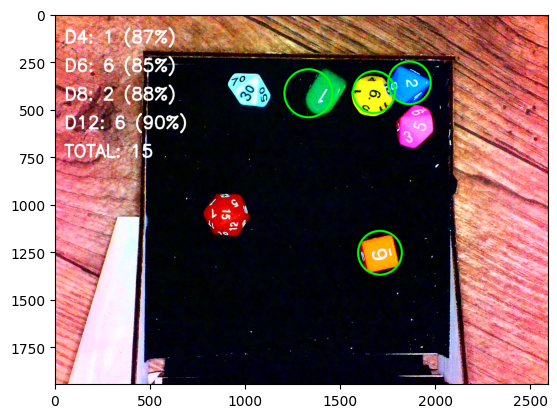

Images\Rolls\d4d6d8d10d12d20d100 (2).jpg
Finished search because best die match, 12, has low confidence: 0.439702


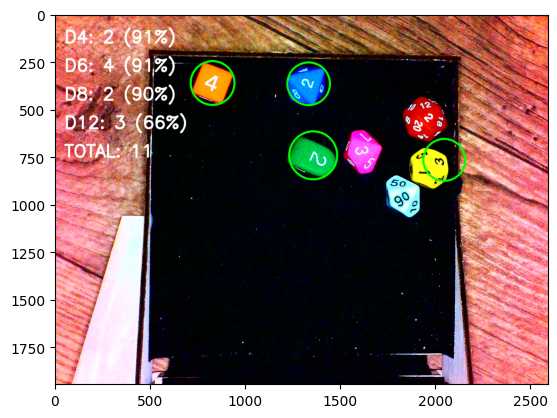

Images\Rolls\d4d6d8d10d12d20d100 (3).jpg
Finished search because best die match, 6, has low confidence: 0.344330


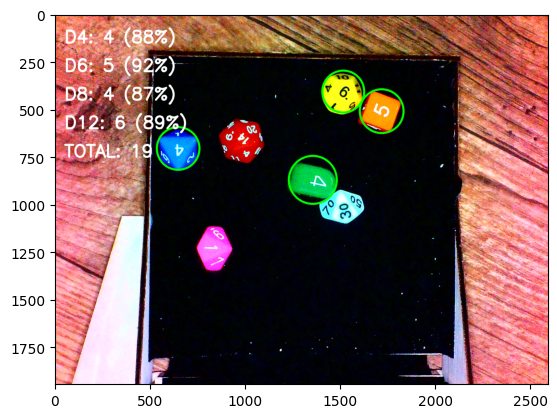

Images\Rolls\d4d6d8d10d12d20d100 (4).jpg
Finished search because best die match, 6, has low confidence: 0.324197


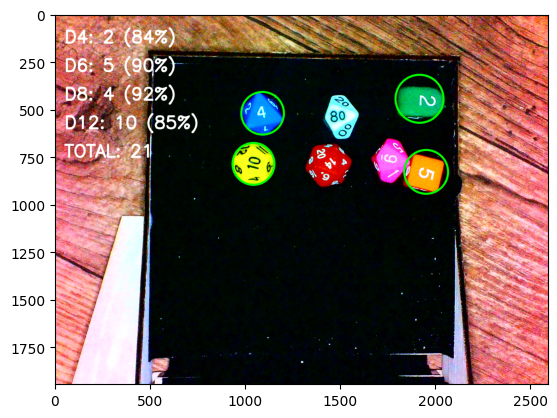

Images\Rolls\d4d6d8d10d12d20d100 (5).jpg
Finished search because best die match, 6, has low confidence: 0.314664


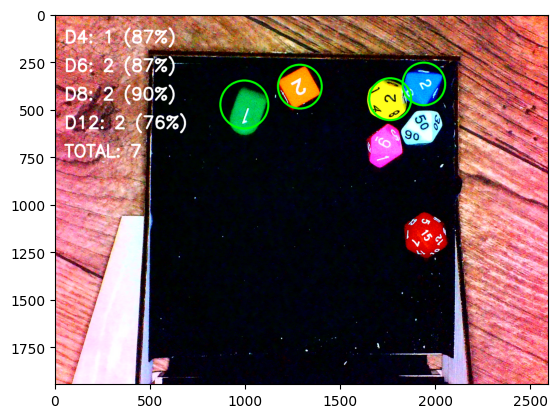

Images\Rolls\d4d6d8d10d12d20d100 (6).jpg


In [2]:


log_file = roll_template.replace("R#","log").replace("jpg","csv")
with open(log_file, 'w', newline='', encoding='utf-8') as log_file_handle:
    csv_writer = csv.DictWriter(log_file_handle,fieldnames=DieFaceSample.csv_fieldnames,extrasaction='ignore')
    csv_writer.writeheader()
    for roll in np.arange(1,51):
        roll_file = roll_template.replace("R#",str(roll))
        print(roll_file)
        image_roll_RGB = cv.cvtColor(cv.imread(roll_file),cv.COLOR_BGR2RGB)
        results = dieset.get_die_faces_from_image(image_roll_RGB,rank_confidence=0.75, face_confidence=0.75,mask=roi_mask, camera_matrix=camera_matrix, log_level=LOG_LEVEL_INFO)
        for d in results.values():
            for r in d:
                for m in r[2]:
                    m["source"] = roll_file
                    csv_writer.writerow(m)


In [ ]:
roll = 1
roll_file = roll_template.replace("R#",str(roll))
image_roll_RGB = cv.cvtColor(cv.imread(roll_file),cv.COLOR_BGR2RGB)
results = dieset.get_die_faces_from_image(image_roll_RGB,rank_confidence=0.5, face_confidence=0.25, mask=roi_mask, camera_matrix=camera_matrix, log_level=LOG_LEVEL_INFO)